In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Analyse des données

Les données sont fournies par les professeurs et sont disponibles ici: [CORPUS](https://drive.google.com/drive/folders/1kx7Fi1NDqGxK1AeWyH7zypnWQej2U7Sl?usp=drive_link)

**description des données :**

Le corpus se compose de 1051 textes. Pour faciliter le travail, on prend en compte que les textes >= 1820. la date de publication est présente dans le nom des fichiers, qui est toujours conçu de la manière suivante  : (non)(prénom)(titre)(sexe)(date de publication)(date de naissance)(date de décès)...


In [ ]:
import os
import pandas as pd


In [ ]:
folder_path = "/content/drive/MyDrive/data_modelisation/CORPUS DATATION TER"

#liste pour stocker les informations
documents = []
document_lengths = []
word_counts = []

#Parcourir
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and file_name.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            content = file.read()
            documents.append({"File_Name": file_name, "Content": content})
            document_lengths.append(len(content))
            word_counts.append(len(content.split()))

#DataFrame
data_summary = pd.DataFrame({
    "File_Name": [doc["File_Name"] for doc in documents],
    "Num_Characters": document_lengths,
    "Num_Words": word_counts
})

print(data_summary.head())
print("Statistiques de base :")
print(data_summary.describe())


                                           File_Name  Num_Characters  \
0  (AMILA)(Jean)(le grillon enragé)(1)(1970)(191...          299541   
1  (AMILA)(Jean)(le boucher des hurlus)(1)(1982)(...          281388   
2  (ALCOBA)(Laura)(les passagers de l'«anna c.»)(...          320729   
3  (ALLAIS)(Alphonse)(amours, délices et orgues)...          154508   
4  (ALCOBA)(Laura)(manèges. petite histoire arge...          145092   

   Num_Words  
0      63603  
1      58402  
2      65282  
3      31089  
4      30191  
Statistiques de base :
       Num_Characters      Num_Words
count    1.052000e+03    1052.000000
mean     3.680611e+05   75117.427757
std      2.428278e+05   49406.352935
min      2.118000e+03     452.000000
25%      2.064175e+05   42710.500000
50%      3.154850e+05   63982.500000
75%      4.814322e+05   98738.500000
max      1.922647e+06  365243.000000


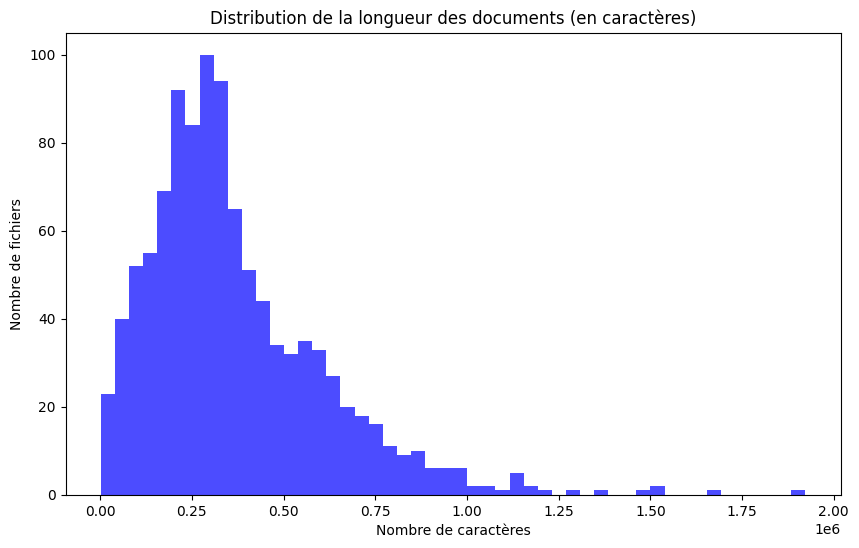

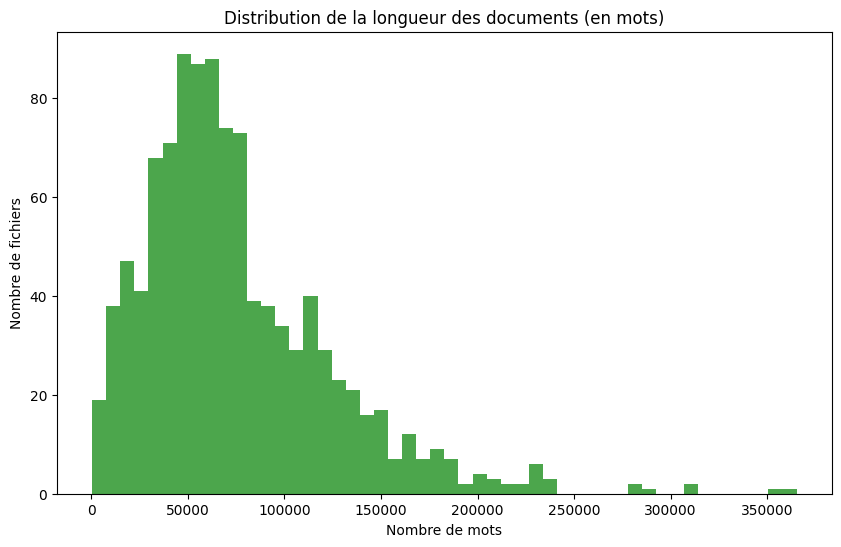

In [ ]:
import matplotlib.pyplot as plt

#longueurs en caractères
plt.figure(figsize=(10, 6))
plt.hist(data_summary['Num_Characters'], bins=50, alpha=0.7, color='blue')
plt.title("Distribution de la longueur des documents (en caractères)")
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de fichiers")
plt.show()

#longueurs en mots
plt.figure(figsize=(10, 6))
plt.hist(data_summary['Num_Words'], bins=50, alpha=0.7, color='green')
plt.title("Distribution de la longueur des documents (en mots)")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de fichiers")
plt.show()


In [ ]:
data_summary

,File_Name,Num_Characters,Num_Words
0,(AMILA)(Jean)(le grillon enragé)(1)(1970)(191...,299541,63603
1,(AMILA)(Jean)(le boucher des hurlus)(1)(1982)(...,281388,58402
2,(ALCOBA)(Laura)(les passagers de l'«anna c.»)(...,320729,65282
3,"(ALLAIS)(Alphonse)(amours, délices et orgues)...",154508,31089
4,(ALCOBA)(Laura)(manèges. petite histoire arge...,145092,30191
...,...,...,...
1047,(AMILA)(Jean)(la lune d’omaha)(1)(1964)(1910)(...,276975,56851
1048,(ALLAIS)(Alphonse)(pas de bile !)(1)(1893)(185...,145850,29904
1049,(AMILA)(Jean)(contest flic)(1)(1972)(1910)(199...,269774,54025
1050,(ALLARD)(Francine)(la persistance du romarin)(...,740983,149418


                                           File_Name  Num_Characters  \
0  (AMILA)(Jean)(le grillon enragé)(1)(1970)(191...          299541   
1  (AMILA)(Jean)(le boucher des hurlus)(1)(1982)(...          281388   
2  (ALCOBA)(Laura)(les passagers de l'«anna c.»)(...          320729   
3  (ALLAIS)(Alphonse)(amours, délices et orgues)...          154508   
4  (ALCOBA)(Laura)(manèges. petite histoire arge...          145092   

   Num_Words  Publication_Year  
0      63603              1970  
1      58402              1982  
2      65282              2011  
3      31089              1898  
4      30191              2007  


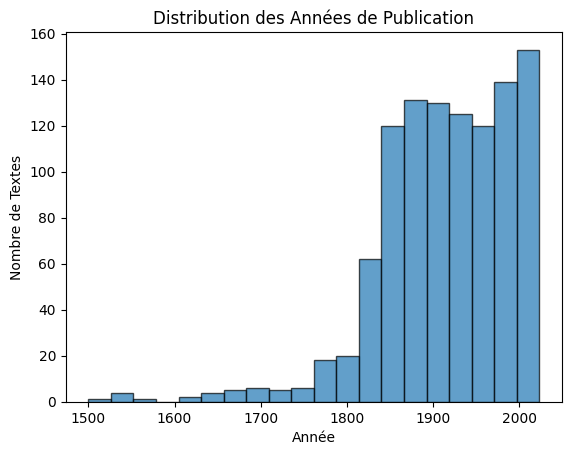

In [ ]:
#extraire la date de publication depuis le nom du fichier
def extract_pub_date(file_name):
    import re
    match = re.search(r"\((\d{4})\)", file_name)
    return int(match.group(1)) if match else None

data_summary["Publication_Year"] = data_summary["File_Name"].apply(extract_pub_date)

print(data_summary.head())

#Distribution des années de publication
plt.hist(data_summary["Publication_Year"], bins=20, edgecolor="k", alpha=0.7)
plt.title("Distribution des Années de Publication")
plt.xlabel("Année")
plt.ylabel("Nombre de Textes")
plt.show()


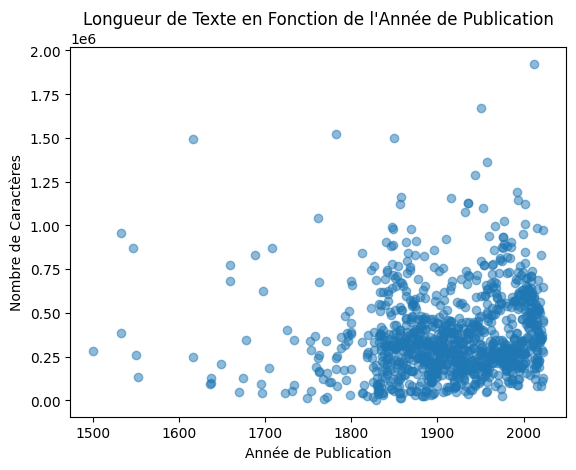

In [ ]:
#longueur de texte vs année de publication
plt.scatter(data_summary["Publication_Year"], data_summary["Num_Characters"], alpha=0.5)
plt.title("Longueur de Texte en Fonction de l'Année de Publication")
plt.xlabel("Année de Publication")
plt.ylabel("Nombre de Caractères")
plt.show()


Sex
Femme    392223.96888
Homme    347628.72807
Name: Num_Characters, dtype: float64


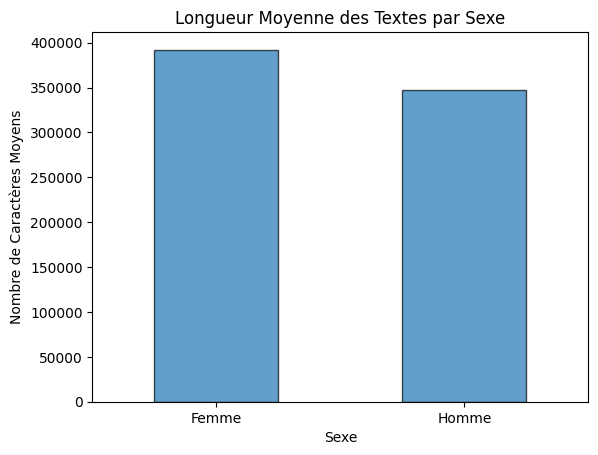

In [ ]:
import matplotlib.pyplot as plt
import re
#(1 = Homme, 2 = Femme)
def extract_sex(file_name):
    match = re.search(r"\((1|2)\)", file_name)
    if match:
        return "Homme" if match.group(1) == "1" else "Femme"
    return None

data_summary["Sex"] = data_summary["File_Name"].apply(extract_sex)
#Longueur moyenne par sexe
sex_lengths = data_summary.groupby("Sex")["Num_Characters"].mean()
print(sex_lengths)

sex_lengths.plot(kind="bar", edgecolor="k", alpha=0.7)
plt.title("Longueur Moyenne des Textes par Sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de Caractères Moyens")
plt.xticks(rotation=0)
plt.show()
#hum interesting..

# Traitement


In [ ]:
import os
import re
import pandas as pd

In [ ]:
folder_path = "/content/drive/MyDrive/data_modelisation/CORPUS DATATION TER"


In [ ]:
documents = []

def extract_publication_year(file_name):
    pattern = r"\((\d{4})\)"
    match = re.search(pattern, file_name)
    if match:
        return int(match.group(1))
    return None

for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and file_name.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            content = file.read()
            publication_year = extract_publication_year(file_name)
            documents.append({
                "Publication_Year": publication_year,  # Année de publication
                "Text": content  # Texte
            })
df = pd.DataFrame(documents)
print(df.head())


   Publication_Year                                               Text
0              1970  jean amila le grillon enragé gallimard vonette...
1              1982  jean amila le boucher des hurlus gallimard la ...
2              2011  laura alcoba les passagers de l anna c . galli...
3              1898  alphonse allais amours , délices et orgues à m...
4              2007  alcoba , laura manèges : petite histoire argen...


In [ ]:
df

,Publication_Year,Text
0,1970,jean amila le grillon enragé gallimard vonette...
1,1982,jean amila le boucher des hurlus gallimard la ...
2,2011,laura alcoba les passagers de l anna c . galli...
3,1898,"alphonse allais amours , délices et orgues à m..."
4,2007,"alcoba , laura manèges : petite histoire argen..."
...,...,...
1047,1964,jean amila la lune d omaha gallimard i on ne v...
1048,1893,alphonse allais pas de bile ! chapitre le pauv...
1049,1972,jean amila contest flic éditions gallimard l a...
1050,2010,francine allard la persistance du romarin edit...


In [ ]:
print(df.isnull().sum())


Publication_Year    0
Text                0
dtype: int64


In [ ]:
#compter les textes dont la date de publication est ≤ 1820
count_before_1820 = df[df["Publication_Year"] < 1820].shape[0]

print(f"Nombre de textes publiés avant ou en 1820 : {count_before_1820}")


Nombre de textes publiés avant ou en 1820 : 77


In [ ]:
#filtrer les textes postérieurs à 1820
df = df[df["Publication_Year"] >=1820].reset_index(drop=True)

print(df.head())
print(df.info())


   Publication_Year                                               Text
0              1970  jean amila le grillon enragé gallimard vonette...
1              1982  jean amila le boucher des hurlus gallimard la ...
2              2011  laura alcoba les passagers de l anna c . galli...
3              1898  alphonse allais amours , délices et orgues à m...
4              2007  alcoba , laura manèges : petite histoire argen...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Publication_Year  975 non-null    int64 
 1   Text              975 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.4+ KB
None


In [ ]:
df

,Publication_Year,Text
0,1970,jean amila le grillon enragé gallimard vonette...
1,1982,jean amila le boucher des hurlus gallimard la ...
2,2011,laura alcoba les passagers de l anna c . galli...
3,1898,"alphonse allais amours , délices et orgues à m..."
4,2007,"alcoba , laura manèges : petite histoire argen..."
...,...,...
970,1964,jean amila la lune d omaha gallimard i on ne v...
971,1893,alphonse allais pas de bile ! chapitre le pauv...
972,1972,jean amila contest flic éditions gallimard l a...
973,2010,francine allard la persistance du romarin edit...


In [ ]:
df.to_csv("donnée.csv", index=False, encoding="utf-8")


# Classification Chronologique de Textes Littéraires

## installation

In [ ]:
!pip install sacremoses


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 28.2 MB/s eta 0:00:00


In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
pip install --upgrade scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
!pip install datasets

# categories

**J'ai crée des catégories pour simplifier la classification:**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = "/content/drive/MyDrive/data_modelisation/donnée.csv"
df = pd.read_csv(file_path, encoding='utf-8')

In [ ]:
min_date = df["Publication_Year"].min()
print(f"La plus petite date dans le dataset est : {min_date}")

La plus petite date dans le dataset est : 1820


In [ ]:
#intervalles pour les catégories
bins = list(range(1820, 2030, 40))  # Intervalles de 20 ans / j'ai testé 10, 30, 40, 50
bins[-1] = 2024
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]

#créer les catégories
df["Category"] = pd.cut(df["Publication_Year"], bins=bins, labels=labels, right=False)
print(df[["Publication_Year", "Category"]].head())

   Publication_Year   Category
0              1970  1940-1979
1              1982  1980-2023
2              2011  1980-2023
3              1898  1860-1899
4              2007  1980-2023


In [ ]:
print(df.columns)


Index(['Publication_Year', 'Text', 'Category'], dtype='object')


In [ ]:
df

,Publication_Year,Text,Category
0,1970,jean amila le grillon enragé gallimard vonette...,1940-1979
1,1982,jean amila le boucher des hurlus gallimard la ...,1980-2023
2,2011,laura alcoba les passagers de l anna c . galli...,1980-2023
3,1898,"alphonse allais amours , délices et orgues à m...",1860-1899
4,2007,"alcoba , laura manèges : petite histoire argen...",1980-2023
...,...,...,...
970,1964,jean amila la lune d omaha gallimard i on ne v...,1940-1979
971,1893,alphonse allais pas de bile ! chapitre le pauv...,1860-1899
972,1972,jean amila contest flic éditions gallimard l a...,1940-1979
973,2010,francine allard la persistance du romarin edit...,1980-2023



Nombre de données par catégorie :
Category
1820-1859    146
1860-1899    198
1900-1939    197
1940-1979    188
1980-2023    246
Name: count, dtype: int64


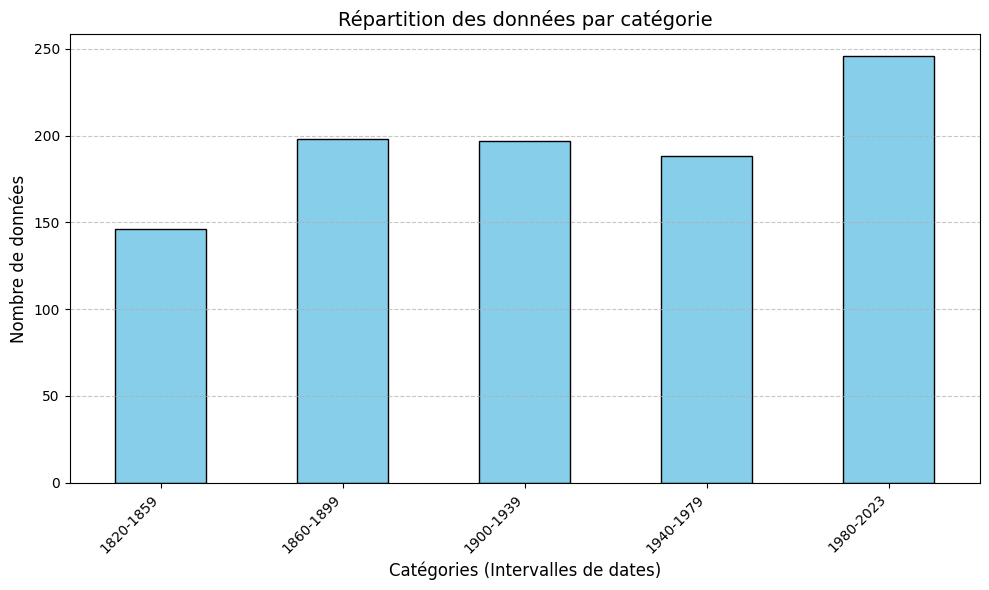

In [ ]:
import matplotlib.pyplot as plt
#nombre de données par catégorie
category_counts = df["Category"].value_counts(sort=False)
print("\nNombre de données par catégorie :")
print(category_counts)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Répartition des données par catégorie", fontsize=14)
plt.xlabel("Catégories (Intervalles de dates)", fontsize=12)
plt.ylabel("Nombre de données", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# MODELES



---


**Texte brut -> Prétraitement -> Tokenisation -> model-> [CLS] -> Couche de Classification -> Prédiction -> Evaluation**

---



## Camembert

In [ ]:
df_1 = df.copy()

**Diviser en 80 % pour l'entraînement et 20 % pour le test.**


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_1, test_size=0.2, random_state=42)


**Préparer les catégories pour des modèles nécessitant des données numériques.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encodeur pour toutes les catégories
label_encoder = LabelEncoder()

#uniquement sur les catégories du jeu d'entraînement
label_encoder.fit(train_df["Category"])

print("Catégories originales et leurs correspondances :")
for index, category in enumerate(label_encoder.classes_):
    print(f"{index} -> {category}")

Catégories originales et leurs correspondances :
0 -> 1820-1859
1 -> 1860-1899
2 -> 1900-1939
3 -> 1940-1979
4 -> 1980-2023


In [ ]:
#ajout dans DataFrames
train_df["labels"] = label_encoder.transform(train_df["Category"])
try:
    test_df["labels"] = label_encoder.transform(test_df["Category"])
except ValueError as e:
    print(f"Erreur : certaines catégories dans le jeu de test ne sont pas présentes dans l'ensemble d'entraînement.\n{e}")

print("\nAperçu des données encodées dans le jeu d'entraînement :")
print(train_df[["Text", "Category", "labels"]].head())

print("\nAperçu des données encodées dans le jeu de test :")
print(test_df[["Text", "Category", "labels"]].head())



Aperçu des données encodées dans le jeu d'entraînement :
                                                  Text   Category  labels
969  alphonse allais pour cause de fin de bail ce l...  1860-1899       1
678  joris karl huysmans les soeurs vatard ! . . im...  1860-1899       1
894  ! cover images cover . png ! feedbooks images ...  1860-1899       1
33   georges jean arnaud les jeudis de julie fleuve...  1940-1979       3
31   ! couverture images cover . jpg aragon les yeu...  1940-1979       3

Aperçu des données encodées dans le jeu de test :
                                                  Text   Category  labels
199  maurice blanchot thomas l obscur gallimard i t...  1940-1979       3
789  à propos de bibebook : vous avez la certitude ...  1860-1899       1
174  georges bernanos nouvelle histoire de mouchett...  1900-1939       2
467  ! couverture . . images cover . jpg simone de ...  1940-1979       3
66   à propos de bibebook : vous avez la certitude ...  1900-1939       2


In [ ]:
from datasets import Dataset
#convertir en Dataset Hugging Face
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


In [ ]:
from transformers import AutoTokenizer

#charger le tokenizer CamemBERT
Camembert = "camembert-base"
tokenizer = AutoTokenizer.from_pretrained(Camembert)

#fct tokenisation
def tokenize_function(examples):
    return tokenizer(examples["Text"], truncation=True, padding="max_length", max_length=512) #512 #128 #256 #384

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

In [ ]:
#Appliquer la tokenisation
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

print(tokenized_train[0])


Map:   0%|          | 0/780 [00:00<?, ? examples/s]

Map:   0%|          | 0/195 [00:00<?, ? examples/s]

{'Publication_Year': 1899, 'Text': 'alphonse allais pour cause de fin de bail ce livre est respectueusement dédié à la patronne du café de la poste à luzarches orne q préface beaucoup de personnes , lesquelles feraient , d ailleurs , bien mieux de se mêler de leurs propres affaires , m ont souvent objecté : monsieur , vous donnez à vos ouvrages des titres qui n ont aucun rapport avec la matière qui constitue le livre , comme par exemple on n est pas des boeufs , le parapluie de l escouade ou amous , délices et orgues . cette façon d agir n est point l indice d une mentalité bien sérieuse . à la longue , ce reproche me piquait au vif et bientôt je m efforçais à ne plus l encourir . je n y suis qu à mi parvenu ; pourtant il y a du progrès , jugez plutôt : j ai intitulé ce livre pour cause de fin de bail , non pas qu il y soit question de rien qui effleure ce sujet , mais simplement parce que je vais déménager au terme d avril prochain . je devais cette explication au lecteur , je la lui 

In [ ]:
from transformers import AutoModelForSequenceClassification

#Nombre de classes
num_labels = len(label_encoder.classes_)

#Charger CamemBERT avec une couche de classification
model = AutoModelForSequenceClassification.from_pretrained(Camembert, num_labels=num_labels)


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from evaluate import load
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
import matplotlib.pyplot as plt

#Charger la métrique
accuracy_metric = load("accuracy")

#calcul des métriques
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy["accuracy"]}


In [ ]:
#TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,                #1e-5 < 2e-5 < 3e-5 < 5e-5 (testé)
    per_device_train_batch_size=16,    #8, 16, 32 (testé)
    num_train_epochs=10,                #6 ou 10 mais  (5,6, 10, 15, 20 testé )
    weight_decay=0.01,                 #Pénalité L2
    logging_dir="./logs",
    save_total_limit=1,
    logging_steps=10,
    load_best_model_at_end=True,       #Charger le meilleur modèle
    metric_for_best_model="accuracy",  #Basé sur accuracy
    greater_is_better=True             #Plus haut est mieux
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#arrêt anticipé
early_stopping = EarlyStoppingCallback(early_stopping_patience=3) #patience=3,

In [ ]:
#Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)




<ipython-input-24-684b1c6aaac7>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
#Entraîner le modèle
training_logs = trainer.train()

logs = trainer.state.log_history

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy
1,1.390600,1.303849,0.379487
2,1.159400,1.198573,0.405128
3,1.064300,1.180651,0.420513
4,0.913500,1.047354,0.528205
5,0.763300,1.040580,0.574359
6,0.639000,1.014091,0.594872
7,0.597500,0.989583,0.594872
8,0.476500,0.994619,0.584615
9,0.489000,1.019875,0.579487


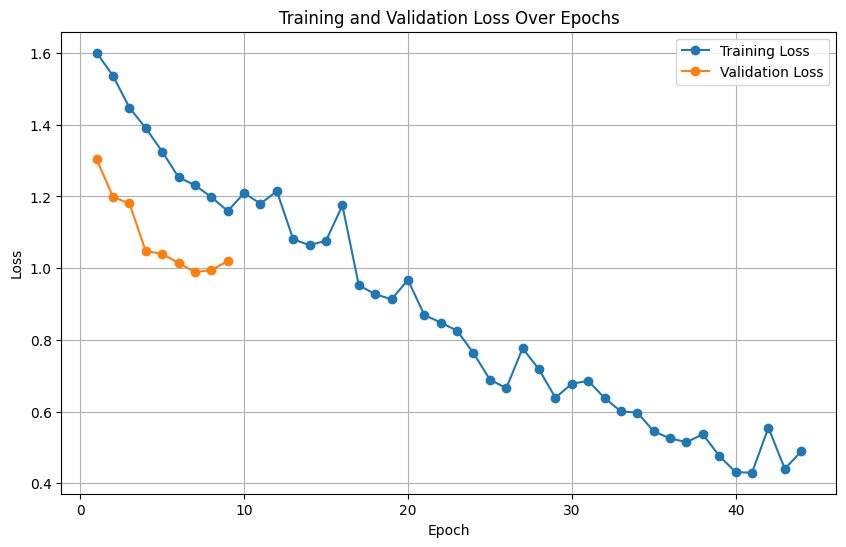

In [ ]:
#LOSS
train_loss = [log["loss"] for log in logs if "loss" in log and "epoch" in log]
val_loss = [log["eval_loss"] for log in logs if "eval_loss" in log]
epochs = range(1, len(train_loss) + 1)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label="Training Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, marker='o', label="Validation Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("resultat camembert")
#Prédiction sur l'ensemble de test
predictions = trainer.predict(tokenized_test)
predicted_labels = predictions.predictions.argmax(-1)
true_labels = test_dataset["labels"]

# Rapport de classification
print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))


resultat camembert


              precision    recall  f1-score   support

   1820-1859       0.67      0.48      0.56        25
   1860-1899       0.48      0.86      0.62        36
   1900-1939       0.62      0.29      0.39        45
   1940-1979       0.61      0.43      0.51        46
   1980-2023       0.68      0.93      0.78        43

    accuracy                           0.59       195
   macro avg       0.61      0.60      0.57       195
weighted avg       0.61      0.59      0.57       195



## Flaubert

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import torch

In [ ]:
df_2 = df.copy()

In [ ]:
#Diviser les données en train/test
train_df2, test_df2 = train_test_split(df_2, test_size=0.2, random_state=42)


In [ ]:
#Encoder les catégories
label_encoder = LabelEncoder()
label_encoder.fit(train_df2["Category"])
train_df2["labels"] = label_encoder.transform(train_df2["Category"])
test_df2["labels"] = label_encoder.transform(test_df2["Category"])

In [ ]:
#cat et corespondances
print("Catégories / correspondances :")
for index, category in enumerate(label_encoder.classes_):
    print(f"{index} -> {category}")

Catégories / correspondances :
0 -> 1820-1859
1 -> 1860-1899
2 -> 1900-1939
3 -> 1940-1979
4 -> 1980-2023


In [ ]:
#Convertir en Dataset Hugging Face
train_dataset2 = Dataset.from_pandas(train_df2)
test_dataset2 = Dataset.from_pandas(test_df2)


In [ ]:
#Charger le tokenizer Flaubert Large Cased
Flaubert = "flaubert/flaubert_base_cased"
tokenizer2 = AutoTokenizer.from_pretrained(Flaubert)

#Fonction de tokenisation
def tokenize_function(examples):
    return tokenizer2(examples["Text"], truncation=True, padding="max_length", max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/896k [00:00<?, ?B/s]

In [ ]:
#Appliquer la tokenisation
tokenized_train2 = train_dataset2.map(tokenize_function, batched=True)
tokenized_test2 = test_dataset2.map(tokenize_function, batched=True)

#Charger le modèle Flaubert Large Cased avec une couche de classification
num_labels = len(label_encoder.classes_)
model2 = AutoModelForSequenceClassification.from_pretrained(Flaubert, num_labels=num_labels)


Map:   0%|          | 0/780 [00:00<?, ? examples/s]

Map:   0%|          | 0/195 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

Some weights of FlaubertForSequenceClassification were not initialized from the model checkpoint at flaubert/flaubert_base_cased and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from evaluate import load
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
import matplotlib.pyplot as plt

#Charger la métrique
accuracy_metric = load("accuracy")

#calcul des métriques
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)  #Prendre les prédictions
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy["accuracy"]}


In [ ]:
#TrainingArguments
training_args2 = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,                # 1e-5 < 2e-5 < 3e-5 < 5e-5
    per_device_train_batch_size=16,     # 8, 16, 32
    num_train_epochs=6,                # 6 ou 10 mais leger overfitting a partir de 6 epoch
    weight_decay=0.01,                 # Pénalité L2
    logging_dir="./logs",
    save_total_limit=1,
    logging_steps=10,
    load_best_model_at_end=True,       # Charger le meilleur modèle
    metric_for_best_model="accuracy",  # Basé sur `accuracy`
    greater_is_better=True             # Plus haut est mieux
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#arrêt anticipé
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

In [ ]:
#Trainer
trainer = Trainer(
    model=model2,
    args=training_args2,
    train_dataset=tokenized_train2,
    eval_dataset=tokenized_test2,
    tokenizer=tokenizer2,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)


<ipython-input-24-f5f199d08e41>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
#Entraîner
training_logs = trainer.train()

logs = trainer.state.log_history

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy
1,1.533300,1.379128,0.374359
2,1.207400,1.226461,0.420513
3,1.119600,1.157708,0.482051
4,0.965800,1.141058,0.466667
5,0.860000,1.150323,0.512821
6,0.684800,1.075619,0.517949


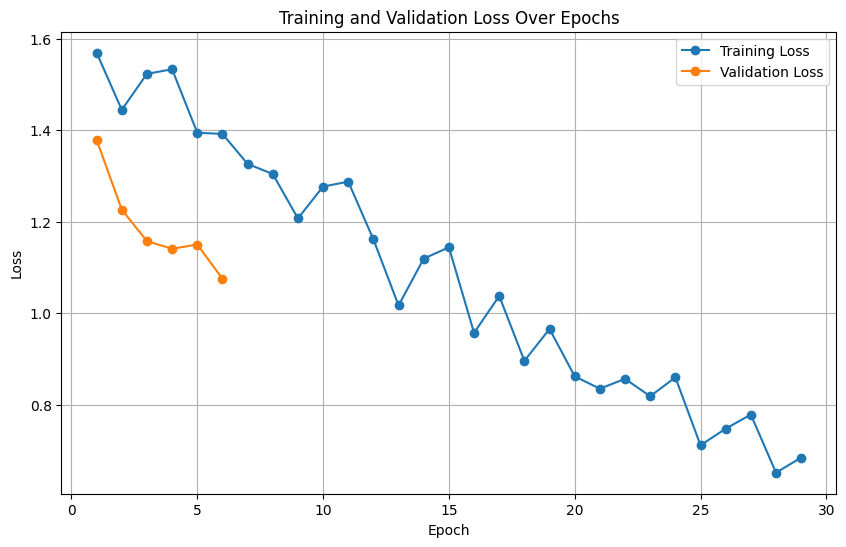

In [ ]:
#LOSS
train_loss = [log["loss"] for log in logs if "loss" in log and "epoch" in log]
val_loss = [log["eval_loss"] for log in logs if "eval_loss" in log]
epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label="Training Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, marker='o', label="Validation Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



In [ ]:
#Prédire sur l'ensemble de test
print("resultat de Flaubert:")
predictions = trainer.predict(tokenized_test2)
predicted_labels = predictions.predictions.argmax(-1)
true_labels = test_dataset2["labels"]

#Générer un rapport de classification
print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))


resultat de Flaubert:


              precision    recall  f1-score   support

   1820-1859       0.35      0.32      0.33        25
   1860-1899       0.44      0.78      0.57        36
   1900-1939       0.59      0.29      0.39        45
   1940-1979       0.57      0.37      0.45        46
   1980-2023       0.61      0.81      0.70        43

    accuracy                           0.52       195
   macro avg       0.51      0.51      0.49       195
weighted avg       0.53      0.52      0.50       195



## mbert

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df_3 = df.copy()

In [ ]:
#Diviser les données en train/test
train_df3, test_df3 = train_test_split(df_3, test_size=0.2, random_state=42)

In [ ]:
#Encoder les catégories
label_encoder = LabelEncoder()
label_encoder.fit(train_df3["Category"])
train_df3["labels"] = label_encoder.transform(train_df3["Category"])
test_df3["labels"] = label_encoder.transform(test_df3["Category"])
print("Catégories / correspondances :")
for index, category in enumerate(label_encoder.classes_):
    print(f"{index} -> {category}")

Catégories / correspondances :
0 -> 1820-1859
1 -> 1860-1899
2 -> 1900-1939
3 -> 1940-1979
4 -> 1980-2023


In [ ]:
#Convertir en Dataset Hugging Face
train_dataset3 = Dataset.from_pandas(train_df3)
test_dataset3 = Dataset.from_pandas(test_df3)

In [ ]:
#Charger le tokenizer mBERT
mBERT = "bert-base-multilingual-cased"
tokenizer3 = AutoTokenizer.from_pretrained(mBERT)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
#Fonction de tokenisation
def tokenize_function(examples):
    return tokenizer3(examples["Text"], truncation=True, padding="max_length", max_length=512)

#Appliquer la tokenisation
tokenized_train3 = train_dataset3.map(tokenize_function, batched=True)
tokenized_test3 = test_dataset3.map(tokenize_function, batched=True)


Map:   0%|          | 0/780 [00:00<?, ? examples/s]

Map:   0%|          | 0/195 [00:00<?, ? examples/s]

In [ ]:
#Charger le modèle mBERT avec une couche de classification
num_labels = len(label_encoder.classes_)
model3 = AutoModelForSequenceClassification.from_pretrained(mBERT, num_labels=num_labels)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Charger la métrique
from evaluate import load
accuracy_metric = load("accuracy")

#Définir la fonction de calcul des métriques
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)  #Prendre les prédictions
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy["accuracy"]}

In [ ]:
#TrainingArguments
training_args3 = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,                # 1e-5 < 2e-5 < 3e-5 < 5e-5
    per_device_train_batch_size=16,    # 8, 16, 32
    num_train_epochs=6,                # 6 ou 10 mais léger overfitting à partir de 6 epoch
    weight_decay=0.01,                 # Pénalité L2
    logging_dir="./logs",
    save_total_limit=1,
    logging_steps=10,
    load_best_model_at_end=True,       # Charger le meilleur modèle
    metric_for_best_model="accuracy",  # Basé sur `accuracy`
    greater_is_better=True             # Plus haut est mieux
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#arrêt anticipé
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

#Trainer
trainer = Trainer(
    model=model3,
    args=training_args3,
    train_dataset=tokenized_train3,
    eval_dataset=tokenized_test3,
    tokenizer=tokenizer3,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)


<ipython-input-77-85a18dd69935>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
#Entraîner
training_logs = trainer.train()
logs = trainer.state.log_history

Epoch,Training Loss,Validation Loss,Accuracy
1,1.532800,1.503141,0.282051
2,1.367600,1.344529,0.353846
3,1.447200,1.431468,0.333333
4,1.320200,1.276152,0.369231
5,1.219200,1.263088,0.389744
6,1.159200,1.270023,0.384615


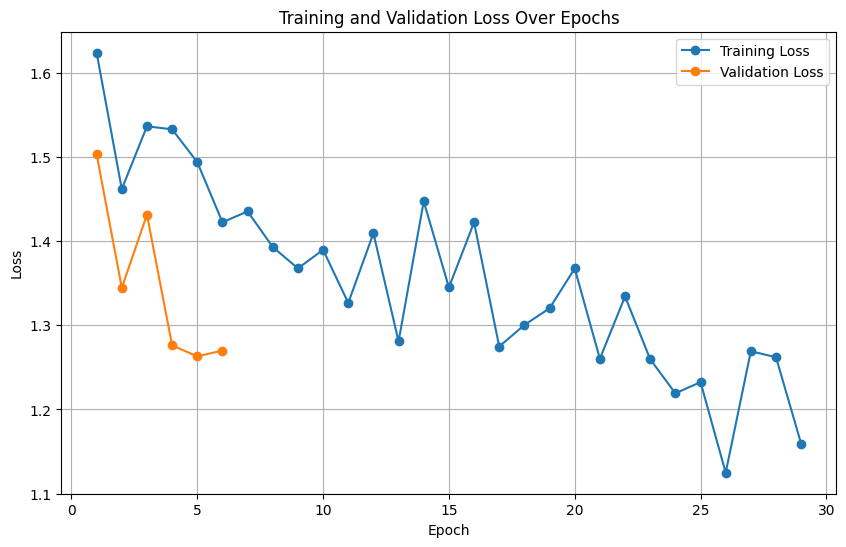

In [ ]:
#LOSS
train_loss = [log["loss"] for log in logs if "loss" in log and "epoch" in log]
val_loss = [log["eval_loss"] for log in logs if "eval_loss" in log]
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label="Training Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, marker='o', label="Validation Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Prédire sur l'ensemble de test
print("Résultat de mBERT:")
predictions = trainer.predict(tokenized_test3)
predicted_labels = predictions.predictions.argmax(-1)
true_labels = test_dataset3["labels"]
print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))

Résultat de mBERT:


              precision    recall  f1-score   support

   1820-1859       0.00      0.00      0.00        25
   1860-1899       0.36      0.81      0.50        36
   1900-1939       0.38      0.07      0.11        45
   1940-1979       0.33      0.04      0.08        46
   1980-2023       0.42      0.98      0.58        43

    accuracy                           0.39       195
   macro avg       0.30      0.38      0.25       195
weighted avg       0.32      0.39      0.27       195



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
